Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "XAVIER MALTAS TARRIDAS"
COLLABORATORS = ""

---

<img src="https://hadoop.apache.org/docs/r1.2.1/images/hadoop-logo.jpg">

# Sistema de fitxes HDFS: configuració del entorn de l'assignatura
(Puntuació: 20% de la PEC1)

Com ja s'ha vist en la part de teoria el sistema d'arxius Hadoop (HDFS) és una part fonamental de l'entorn Big Data d'Apatxe Hadoop. En aquesta pràctica primerament explorarem com podem interactuar des de la línia de comandes amb el sistema de fitxers HDFS. El primer pas és obrir un terminal des del Jupyter o bé executar les comandes mitjançant la comanda "!" dins del Jupyter.

Les comandes que es poden enviar al sistema d'arxius són molt similars a les de bash en entorns Linux.

Per a llistar els arxius del directori arrel del HDFS utilitzarem la comanda *ls*.

`hdfs dfs -ls /`

In [ ]:
!hdfs dfs -ls /

0. Ara es demana llistar tots els fitxers i subdirectoris del directori /aula_M2.858 recursivament, afegint el tamany dels fitxers en format llegible. (0.5 punts)

Es demana emplenar la següent cel·la (de Jupyter) amb la comanda requerida.

In [ ]:
#!hdfs dfs -ls -R /aula_M2.858
import subprocess

# Convert bytes to a more readable format (KB, MB, GB, etc.)
def convert_bytes_to_readable(bytes_size):
    sizes = ['Bytes', 'KB', 'MB', 'GB', 'TB']
    i = 0
    while bytes_size >= 1024 and i < len(sizes) - 1:
        bytes_size /= 1024
        i += 1
    return "{:.2f} {}".format(bytes_size, sizes[i])

# List files and calculate their sizes recursively in HDFS
def list_files_and_calculate_size(directory):
    # Run the 'hdfs dfs -ls -R' command to list files and directories recursively
    command = ['hdfs', 'dfs', '-ls', '-R', directory]
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Check if the command was successful
    if result.returncode == 0:
        # Decode the bytes to a string
        output_text = result.stdout.decode('utf-8')
        
        # Split the output by newline to process each line
        output_lines = output_text.split('\n')
        
        # Initialize variables to store current directory and size
        current_directory = ''
        current_size = 0
        
        # Iterate through the output lines
        for line in output_lines:
            # Check if the line represents a directory
            if line.endswith(":"):
                current_directory = line[:-1]
            else:
                # Split each line into size and file path
                parts = line.split()
                if len(parts) >= 8:
                    size = int(parts[4])
                    path = parts[7]
                    
                    # Calculate the total size of files in the current directory
                    current_size += size
                    
                    # Convert size to a more readable format
                    readable_size = convert_bytes_to_readable(size)
                    
                    # Build the output string and print it
                    output_string = "Size: {}, Path: {}/{}".format(readable_size, current_directory, path)
                    print(output_string)
        
        # Convert the total size to a more readable format
        total_readable_size = convert_bytes_to_readable(current_size)
        
        # Print the total size of files in the directory
        print("Total Size of Files in {}: {}".format(directory, total_readable_size))
    else:
        # If the command failed, print the error message
        print("Error:", result.stderr.decode('utf-8'))

# HDFS directory to list recursively
hdfs_directory = '/aula_M2.858'

# Call the function to list files and calculate their sizes
list_files_and_calculate_size(hdfs_directory)

Tal com es veurà a continuació les comandes que HDFS proporciona, permeten: llistar, consultar, pujar o baixar arxius des del directori local en HDFS. Com ja s'ha pogut veure el directori 'aula_M2.858' conté una sèrie de subdirectoris on es proporcionaran alguns arxius per a fer els següents exercicis. A continuació es demana executar una sèrie d'operacions que deixaran el seu directori hdfs personal configurat per a la realització de l'assignatura. Pot trobar el manual de les comandes del sistema HDFS en el següent link [HDFS Commands]
(https://hadoop.apache.org/docs/current/hadoop-project-dist/hadoop-hdfs/hdfscommands.html).

1. Es demana crear la carpeta "data" dins del directori HDFS /user/\< loginestudiant \>/ (0.5 punts)

In [ ]:
!hdfs dfs -mkdir data
!hdfs dfs -ls

2. Copiar al directori "data" que acabeu de crear els fitxers "Folds5x2_*pp.csv" i "LoremIpsum.txt" que es troben en el directori HDFS /aula_M2.858/data/. Utilitzeu la comanda 'hdfs dfs -cp' per a copiar el fitxer. Ha de realitzar-se en una sola comanda, no es donarà per vàlid si es realitza en dos comandes. (0.5 punts)

In [ ]:
!hdfs dfs -cp /aula_M2.858/data/Folds5x2_*pp.csv /aula_M2.858/data/LoremIpsum.txt data
!hdfs dfs -ls data

3. Copiar les 5 primeres línies del fitxer LoremIpsum.txt que acabes de copiar, al fitxer LoremIpsum_5.txt al directori HDFS /user/\< loginestudiant \>/data. Us seran d'utilitat les comandes 'hdfs dfs -cat' i 'hdfs dfs -put' a part de la comanda clàssic de bash 'head'. (0.5 punts)

In [ ]:
import subprocess

# HDFS path for the source file
source_file = 'data/LoremIpsum.txt'

# Use 'hdfs dfs -cat' to read the first 5 lines and capture the output
cat_command = ['hdfs', 'dfs', '-cat', source_file]
cat_process = subprocess.Popen(cat_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Read the first 5 lines and save the output to a local file
output_lines = []
for i in range(5):
    line = cat_process.stdout.readline().decode('utf-8')
    if not line:
        break
    output_lines.append(line)

# Save the output to a local file
with open('LoremIpsum_5.txt', 'w') as output_file:
    output_file.writelines(output_lines)

# Close the 'hdfs dfs -cat' process
cat_process.terminate()

#Upload the output local file to HDFS
!hdfs dfs -put LoremIpsum_5.txt data/.

#Show the content of the new HDFS file
!hdfs dfs -cat data/LoremIpsum_5.txt

<img src="https://miro.medium.com/max/1400/1*MauvaQb4aokes29WJ27OnQ.png" width="300" height="400">

# SQOOP: Ingesta de dades (Puntuació: 40% de la PEC1)

Com ja s'ha vist en la part de teoria el sistema SQOOP és una eina fonamental de l'entorn Big Data d'Apatxe Hadoop. Sqoop ens permet portar dades de bases de dades relacionals a HDFS, la qual cosa coneixem com a ingesta de dades. La ingesta de dades és el primer pas de qualsevol projecte Big Data, ja que abans de començar a veure com emmagatzemar i processar les dades en els entorns Big Data el primer que hem de fer és ingestar dades en ells. En aquesta pràctica explorarem com podem interactuar des de la línia de comandos amb SQOOP. Hem preparat una Base de dades relacional MySQL amb diverses taules, en els següents exercicis interactuarem amb la BBDD, farem algunes consultes a les dades i finalment ingestarem unes dades en HDFS.

**Per a executar els exercicis de SQOOP no podreu fer-ho des del notebook, haureu de fer-ho des de la terminal. Per a obrir la terminal podeu fer-ho des de la icona del + a dalt a l'esquerra i després en Others -> Terminal. Aquesta part de la pràctica la lliurareu adjuntant captures de pantalla de les comandes executades i del resultat de l'execució en aquest mateix notebook**

En el següent enllaç podeu trobar tota la informació sobre les comandes per a importar dades amb SQOOP:
https://sqoop.apache.org/docs/1.4.6/SqoopUserGuide.html#_literal_sqoop_import_literal

Per al bloc d'exercicis de SQOOP necessiteu coneixements bàsics de SQL, existeix nombrosa documentació en línia sobre SQL, per exemple en aquest tutorial podreu trobar tot el necessari per a fer aquests exercicis: https://www.tutorialspoint.com/sql/index.htm

En primer lloc, una vegada estigueu en la consola, heu d'accedir a la base de dades MySQL utilitzant el vostre usuari i contrasenya amb la següent comanda (una vegada introduïu la comanda us demanarà que poseu el password que us hem facilitat):

In [ ]:
mysql -u <USER_NAME> -p

1. Utilitzeu la BBDD **DWH_RESERVES** i llisteu les taules que existeixen. La base de dades disposa d'1 taula de fets (taula fact) i 4 taules de dimensions, exploreu les taules i expliqueu com es relacionen entre elles i quina informació contenen. (0.25 punts)

In [ ]:
use DWH_RESERVAS;

In [ ]:
#All use code
SHOW TABLES;
DESCRIBE d_hotel;
DESCRIBE d_pais;
DESCRIBE d_regimen;
DESCRIBE d_tipo_habitacion;
DESCRIBE h_reserva;

Les taules que trobem a la base de dades són les següents:

* d_hotel 
* d_pais
* d_regimen
* d_tipo_habitacion
* h_reserva

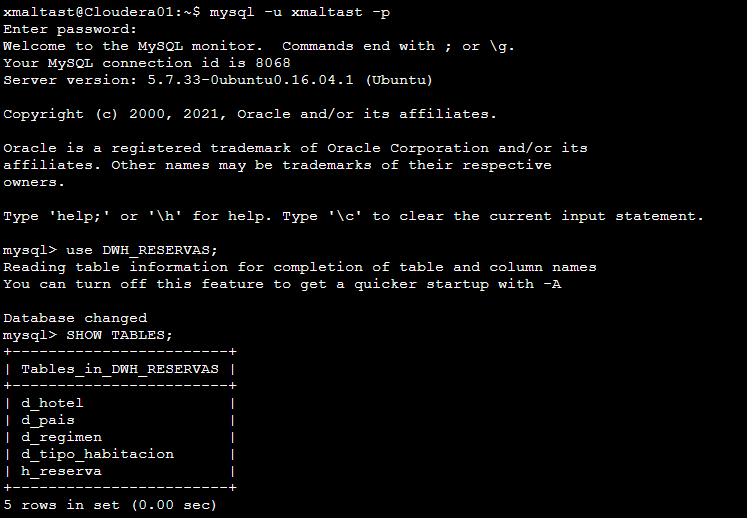

Donada la nomenclatura utilitzada, ja podem suposar que la taula de fets és 'h_reserva', mentre que les altres 4 corresponen a les taules de dimensions. Si volem obtenir més informació de cada una de les taules, utilitzant la comanda 'DESCRIBE', rebrem l'estructura de la taula.

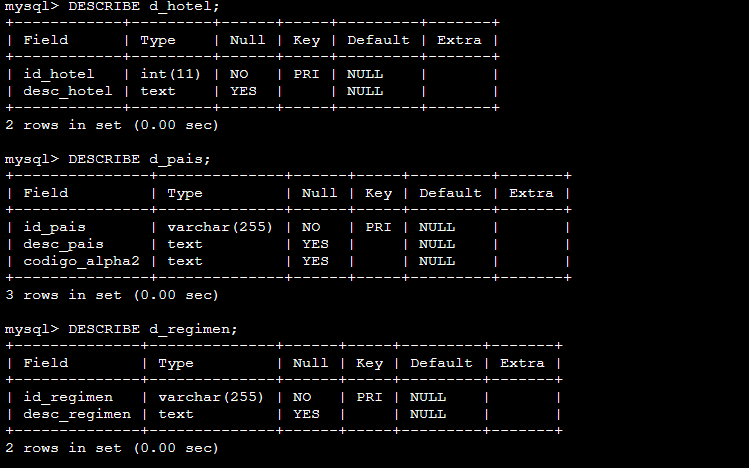
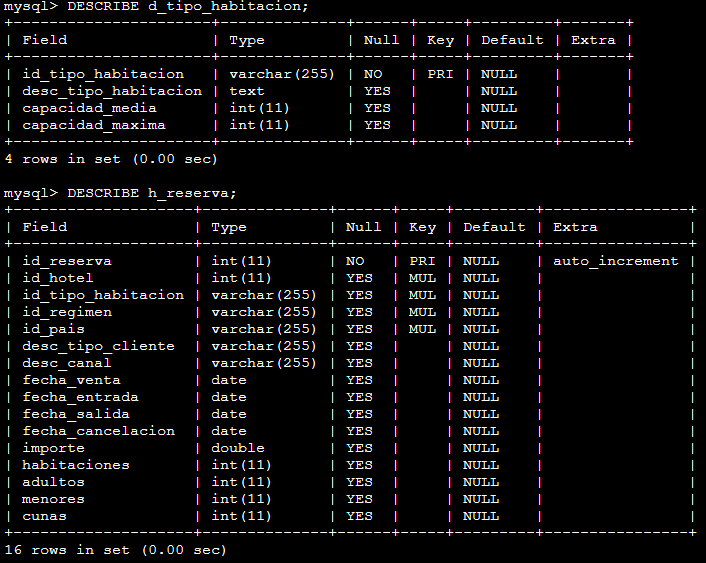

A continuació proporcionarem informació descriptiva de cada una de les taules i les relacions entre elles.

#### d_hotel (Dimension table - Informació hotel)
- 'id_hotel' (Primary Key): Identificador per cada hotel.
- 'desc_hotel': Informació descriptiva de cada hotel.

#### d_pais (Dimension table - Informació del pais)
- 'id_pais' (Primary Key): Identificador per cada país. 
- 'desc_pais': Informació descriptiva de cada país.
- 'codigo_alpha2': Codi alfa 2 per a cada país.

#### d_regimen (Dimension table - Informació del pla de menjar)
- 'id_regimen' (Primary Key): Identificador per cada menú.
- 'desc_regimen': Informació descriptiva de cada menú.

#### d_tipo_habitacion (Dimension table - Informació tipus habitació)
- 'id_tipo_habitacion' (Primary Key): Identificador per cada tipus d'habitació.
- 'desc_tipo_habitacion': Informació descriptiva sobre cada tipus d'habitació.
- 'capacidad_media': Capacitat mitjana de cada tipus d'habitació.
- 'capacidad_maxima': Capacitat màxima de cada tipus d'habitació. 

#### h_reserva (Fact table - Informació de la reserva)
- 'id_reserva' (Primary Key): Identificador de la reserva. 
- 'id_hotel' (Foreign Key): Enllaça amb l'id_hotel' amb la taula 'd_hotel'. Indica amb quin hotel està associada la reserva.
- 'id_tipo_habitacion' (Foreign Key): Enllaça amb l'id_tipo_habitacion' de la taula 'd_tipo_habitacion'. Especifica el tipus d'habitació de la reserva. 
- 'id_regimen' (Foreign Key): Enllaça amb l'id_regimen' de la taula 'd_regimen'. Especifica el menú associat a la reserva. 
- 'id_pais' (Foreign Key): Enllaça amb l'id_pais' de la taula 'd_pais'. Especifica el país associat amb la reserva. 
- 'desc_tipo_cliente' : Informació descriptiva sobre el tipus de client per a la reserva.
- 'desc_canal' : Informació descriptiva sobre el canal de la reserva.
- 'fecha_venta' : Data de reserva.
- 'fecha_entrada' : Data d'entrada.
- 'fecha_salida' : Data de sortida. 
- 'fecha_cancelacion' : Data de cancel·lació (si escau).
- 'importe' : Cost o preu total de la reserva. 
- 'habitaciones' : Nombre d'habitacions reservades.
- 'adultos' : Nombre d'adults.
- 'menores' : Nombre de menors. 
- 'cunas' : Nombres de llits bressols sol·licitats.


#### Relacions de taula

- Les relacions s'estableixen a través de claus estrangeres a la taula de fets 'h_reserva'.
- Les claus externes a la taula de fets 'h_reserva' fan referència a les claus primàries de les taules de dimensió. (d_hotel, d_regimen, d_tipo_habitacionk d_pais). 

2. Consulteu la taula **h_reserva** limitant el numero de files a 10. (0.25 punts)

In [ ]:
#sql query
SELECT *
FROM h_reserva
LIMIT 10;

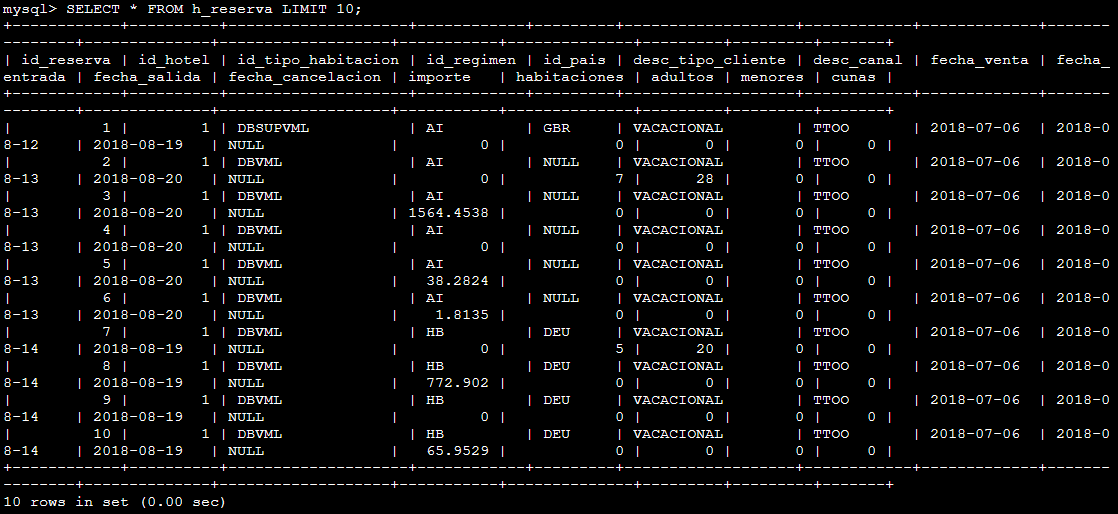

3. Volem saber la descripció del tipus d'habitacions més reservades. Realitzeu una query que retorni la descripció de les habitacions i el número de vegades que ha estat llogada una habitació d'aquest tipus. (0.5 punts)

In [ ]:
# sql query
SELECT dth.desc_tipo_habitacion AS Room_Type_Description, COUNT(*) AS Reservation_Count FROM h_reserva AS hr
INNER JOIN d_tipo_habitacion AS dth ON hr.id_tipo_habitacion = dth.id_tipo_habitacion
GROUP BY dth.desc_tipo_habitacion
ORDER BY Reservation_Count DESC;

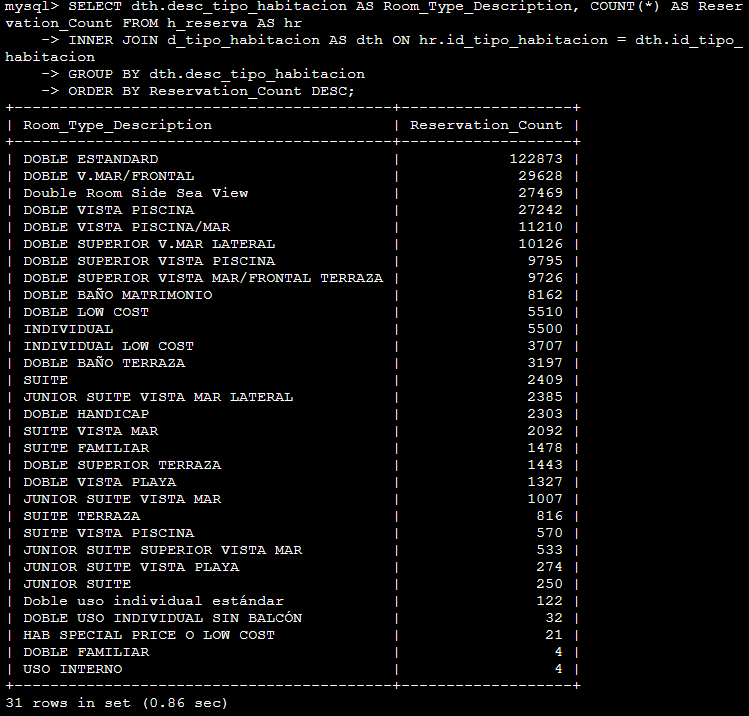


 4. Creeu un procés Sqoop que traspassi la informació de la taula de MySQL **d_pais** a la ruta de HDFS /user/ vostre_user_name /d_pais. Tindreu que completar la comanda que s'indica a continuació i llançar-lo des de la consola (obriu una nova consola per a tenir una execució neta). (1 punt)

In [ ]:
sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS <FILL IN>

In [ ]:
# sqoop command
sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS \
--username xmaltast \
--password cKeG12XI \
--table d_pais \
--target-dir /user/xmaltast/d_pais \
--delete-target-dir \
--m 1

Per assegurar que el procés s'ha realitzat correctament utilitzem la següent comanda:

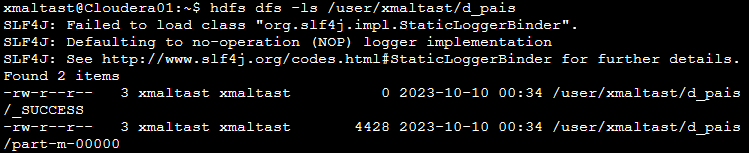

Amb Sqoop podem fer ingestes totals d'una taula com la que acabem de fer en l'exercici 4, o ingestes parcials, només alguns camps o només algunes files utilitzant la clausula WHERE.

5. Creeu un procés Sqoop que traspassi la informació les columnes **id_tipo_habitacion** i **desc_tipo_habitacion** de la taula de MySQL **d_tipo_habitacion** a la ruta de HDFS /user/ vostre_user_*name /d_tipus_habitacion. (1 punt)

In [ ]:
sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS <FILL IN>

In [ ]:
#sqoop command
sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS \
--username xmaltast \
--password cKeG12XI \
--table d_tipo_habitacion \
--columns "id_tipo_habitacion,desc_tipo_habitacion" \
--target-dir /user/xmaltast/d_tipus_habitacion \
--delete-target-dir \
--m 1

Per assegurar que el procés s'ha realitzat correctament utilitzem la següent comanda:

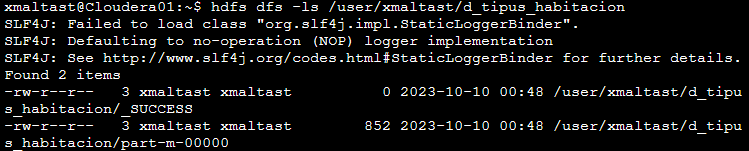

6. Si es tenen 100 taules en una base de dades i es volen importar totes les taules excepte les taules 20, 30 i 50. Com es podria fer sense haver d'importar les taules una a una? Quines comandes Sqoop utilitzaries?. (1 punt)

In [ ]:
# sqoop command example
sqoop import-all-tables \
    --connect jdbc:mysql://localhost/DATABASE_NAME \
    --username your_username \
    --password your_password \
    --warehouse-dir /user/hadoop/your_directory \
    --exclude-tables "table20,table30,table50"
    
        
#Real case with current database        
sqoop import-all-tables \
    --connect jdbc:mysql://localhost/DWH_RESERVAS \
    --username xmaltast \
    --password cKeG12XI \
    --warehouse-dir /user/xmaltast/test \
    --exclude-tables "d_pais,d_tipo_habitacion,d_regimen,h_reserva"

Dins de l'opció 'import-all-table', podem fer servir el paràmetre 'exclude-tables', per llistar les taules que volem evitar.

Podem observar el resultat de l'execució de la comanda utilitzada com a exemple:

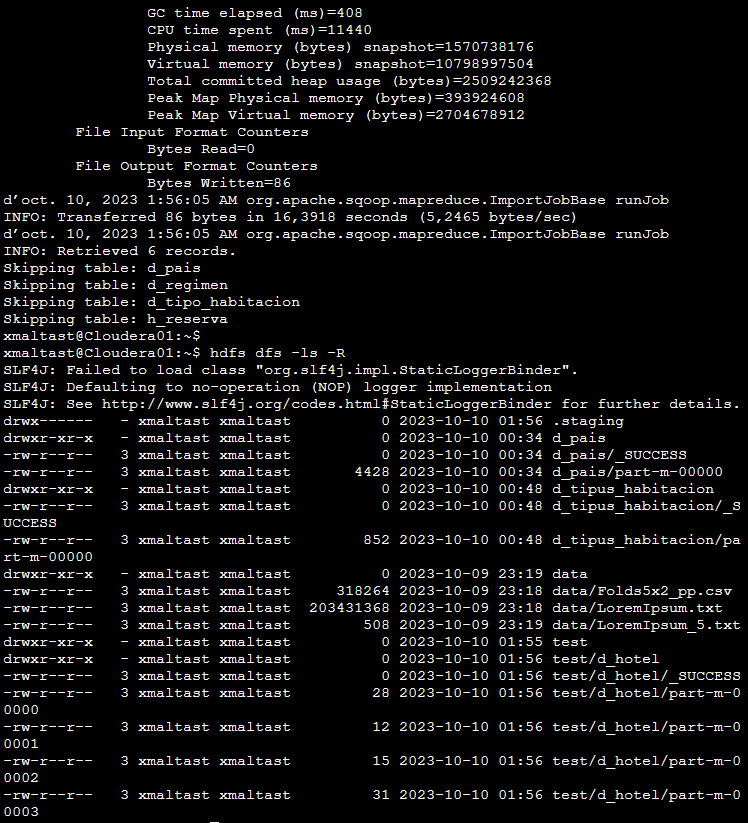

# Vídeo resposta (Puntuació: 40% de la PEC1)

En aquest apartat s'haurà de respondre a les qüestions que es mostren a continuació mitjançant un vídeo resposta d'entre 3 i 5 minuts. Heu de realitzar un enregistrament en la qual se us vegi la cara responent amb les vostres pròpies paraules a les qüestions. Heu de seguir els següents punts per a realitzar el vídeo (4 punts):

1. Al principi del vídeo teniu que dir el vostre nom i DNI mentre mostreu el DNI (el qual ha de veure's amb claredat i ser llegible).

2. Heu de respondre a les preguntes en l'ordre en el qual estan, comentant sempre al principi de cada resposta a quina pregunta us esteu referint.

3. En el cas de no respondre a alguna pregunta, teniu que indicar el número de la pregunta que no responeu i el perquè.

# PREGUNTES:

1. Explica alguna alternativa de sistemes de magatzematge distribuït a HDFS que s'utilitzin en entorns cloud (AWS, Google i Azure) i com es comparen amb HDFS en manera on-premise.

2. Què és la tolerància a fallades i com s'aconsegueix en HDFS?

A part de les comandes que ja heu vist orientades a que cada usuari pugui gestionar el sistema de fitxers HDFS, també és possible explorar l'organització interna dels diferents fitxers existents en els directoris HDFS.

3. Es demana que mitjançant la comanda 'hdfs fsck' determinar i descriure com està estructurat el fitxer _/aula_M2.858/data/LoremIpsum.txt_ dins del sistema HDFS. En concret es demana mostrar com està subdividit en blocs, en quin node estan els blocs i si aquests estan replicats. Podeu consultar com utilitzar la comanda 'hdfs fsck' en la web oficial de referéncia -> [HDFS Commands](https://hadoop.apache.org/docs/current/hadoop-project-dist/hadoop-hdfs/hdfscommands.html).

4. Heu d'explicar tots els camps que apareixen i què indiquen. Quins camps consideres més rellevants?

5. Com sabeu, els diferents fitxers HDFS estan particionats en blocs. Podeu consultar la configuració mitjançant la comanda: 'hdfs getconf -confKey dfs.blocksize'. Quants MB hi ha per bloc?

6. Es demana explorar l'estructura del sistema HDFS mitjançant el seu WebUI. Per a això primerament heu de crear un túnel ssh que ens doni accés al port 9870 (sobre el qual està corrent la Web UI de HDFS). Els alumnes que tingueu un sistema basat en Linux, podeu fer-lo de manera molt simple mitjançant el següent comando:

```python
ssh -p55000 -L 9870:eimtcld.uoc.edu:9870 @eimtcld.uoc.edu
```

Una vegada executat la comanda i logejat correctament podeu accedir a la Web UI de HDFS en l'adreça:

```python
http://localhost:9870/dfshealth.html#*tab-*overview
```

> Nota: els alumnes que només disposin d'un sistema Windows, adjuntem una petita descripció per a crear el túnel ssh mitjançant l'aplicació Putty.

Aquesta pregunta és de text lliure i es demana que es descrigui a continuació quina informació a nivell usuari, configuració i administració podeu obtenir explorant la Web UI, número de DataNodes, localització d'aquests i el seu estat, factors de replicació, errors si n'hi ha, etc.

In [ ]:
# question 3 code
!hdfs fsck /aula_M2.858/data/LoremIpsum.txt -files -blocks -locations

# question 5 code
!hdfs getconf -confKey dfs.blocksize

#### Videos per pregunta

* Pregunta 1: https://drive.google.com/file/d/1bqSRvuyH8xkBFFHgrfdK-p0qJ-NHxPIR/view?usp=sharing
* Pregunta 2: https://drive.google.com/file/d/1dRNcdJlBEl1EItd_Bw0OrtfAgcCL6dSy/view?usp=sharing
* Pregunta 3/4: https://drive.google.com/file/d/1BpvgpQ2-bpoT5v7lCSeSJQszsddrolMH/view?usp=sharing
* Pregunta 5: https://drive.google.com/file/d/1FITJmbFaTQqkOu_QBqsVuPT2Va7JY_eg/view?usp=sharing
* Pregunta 6: https://drive.google.com/file/d/1uEHBYmLGF3JoiFCrjkpmrb3-srhSG5F6/view?usp=sharing

* Full video: https://drive.google.com/file/d/1l1ts8YRYKXEKL1VuT8M6wePJSiRPRi2i/view?usp=sharing